# Instalações e importações

In [2]:
#!pip install sentence-transformers

In [3]:
import numpy as np
np.__version__

'1.26.4'

In [4]:
import pandas as pd
pd.__version__

'2.3.0'

In [5]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
matplotlib.__version__

'3.9.2'

In [6]:
import seaborn as sns
sns.__version__

'0.12.2'

In [7]:
import scipy
scipy.__version__

'1.14.1'

In [8]:
import sklearn
from sklearn.datasets import fetch_olivetti_faces, load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
sklearn.__version__

'1.5.1'

In [9]:
import sentence_transformers
from sentence_transformers import SentenceTransformer
sentence_transformers.__version__

'4.1.0'

# Sistemas lineares

Vamos resolver o sistema linear apresentado na aula usando álgebra linear:

\begin{cases}
127.35 = x_1 + x_2 + 2x_3 + 2x_4 + 10 \\
128.10 = 2x_1 + 2x_2 + 2x_3 + x_4 + 10 \\
134.85 = 2x_1 + x_2 + 2x_3 + 2x_4 + 10 \\
119.85 = 2x_1 + x_2 + 2x_3 + x_4 + 10
\end{cases}

In [10]:
A = np.array([[1, 1, 1, 2, 2],
              [1, 2, 2, 2, 1],
              [1, 2, 1, 2, 2],
              [1, 2, 1, 2, 1]])
y = np.array([127.35, 128.10, 134.85, 119.85])

In [11]:
A_inv = np.linalg.pinv(A)

In [12]:
x = np.dot(A_inv, y)
x

array([16.32,  7.5 ,  8.25, 32.64, 15.  ])

In [13]:
16.32 * 1 + 7.5 * 1 + 8.25 * 1 + 32.64 * 2 + 15 * 2

127.35

In [14]:
y = np.dot(A, x)
y

array([127.35, 128.1 , 134.85, 119.85])

In [15]:
A = np.array([[1, 1, 1, 2, 2],
              [1, 2, 2, 2, 1],
              [1, 2, 1, 2, 2],
              [1, 2, 1, 2, 1],
              [1, 2, 2, 1, 1]])
y = np.array([127.35, 128.10, 134.85, 119.85, 92.3])

In [16]:
A_inv = np.linalg.pinv(A)
x = np.dot(A_inv, y)
x

array([10.  ,  7.5 ,  8.25, 35.8 , 15.  ])

# Redes neurais

## Redes Neurais — Explicação do Slide

Este slide apresenta a **arquitetura e o funcionamento básico de uma rede neural** com foco em previsão de valores contínuos (regressão), exemplificada com uma entrada `X` e uma saída `y`.

---

### 🔢 Entradas e Saídas

- A entrada \( X \) é uma matriz \( 4 \times 5 \), representando um **batch** de 4 observações e 5 **variáveis preditoras**.
- A saída esperada \( y \), também chamada de \( y_{\text{true}} \), é um vetor coluna com 4 valores — um para cada linha de entrada.
- Exemplo:
  \[
  y_{\text{true}} = 
  \begin{bmatrix}
  127.35 \\
  128.10 \\
  134.85 \\
  119.85
  \end{bmatrix}
  \]

---

### 🧠 Arquitetura da Rede Neural

- Camada de entrada com 5 neurônios (I₁ a I₅)
- Uma **camada oculta** com 4 neurônios (H₁ a H₄)
- Uma **camada de saída** com 1 neurônio (O₁)
- Todas as camadas estão **totalmente conectadas**

---

### 🔁 Operações Matriciais

A transformação dos dados de entrada até a camada oculta é feita por:

\[
R_{4 \times 4} = X_{4 \times 5} \cdot W_{5 \times 4} + b_{1 \times 4}
\]

Onde:
- \( X \) é a matriz de entrada
- \( W \) são os pesos da camada oculta
- \( b \) é o vetor de bias

---

### ➕ Broadcasting do Bias

- O vetor de bias \( b_{1 \times 4} \) é replicado por linha para se somar à matriz \( X \cdot W \), resultando em uma matriz \( 4 \times 4 \)
- Este comportamento é automático com **broadcasting** em frameworks como NumPy, TensorFlow e PyTorch

---

### 🔮 Saída da Rede

- A saída da camada oculta passa por uma **função de ativação** (não exibida no slide)
- Essa saída é então transformada em uma predição final \( y_{\text{pred}} \), que será comparada com \( y_{\text{true}} \)

---

### 💡 Resumo

- A rede usa **operações matriciais** para transformar entradas em predições
- Permite processar um **batch** de amostras simultaneamente
- Apresenta a noção de **bias + pesos + broadcasting**
- A estrutura apresentada é típica de redes **feedforward** em problemas de regressão


In [50]:
A = np.array([[1, 1, 1, 2, 2],
              [1, 2, 2, 2, 1],
              [1, 2, 1, 2, 2],
              [1, 2, 1, 2, 1]])
y = np.array([127.35, 128.10, 134.85, 119.85])

In [51]:
np.random.seed(6)

In [52]:
W_1 = np.random.randn(5, 4)
W_1

array([[-0.31178367,  0.72900392,  0.21782079, -0.8990918 ],
       [-2.48678065,  0.91325152,  1.12706373, -1.51409323],
       [ 1.63929108, -0.4298936 ,  2.63128056,  0.60182225],
       [-0.33588161,  1.23773784,  0.11112817,  0.12915125],
       [ 0.07612761, -0.15512816,  0.63422534,  0.810655  ]])

In [53]:
b_1 = np.random.randn(4)
b_1

array([ 0.35480861,  1.81259031, -1.3564758 , -0.46363197])

In [54]:
out_1 = np.dot(A, W_1) + b_1
out_1

array([[-1.32397264,  5.19017152,  4.11039629, -0.39538224],
       [-2.24758982,  5.8286576 ,  7.23451523, -2.11830822],
       [-3.81075329,  6.10342305,  5.23746001, -1.90947547],
       [-3.8868809 ,  6.2585512 ,  4.60323467, -2.72013047]])

In [55]:
W_2 = np.random.rand(4, 1)
W_2

array([[0.71727585],
       [0.99420744],
       [0.25561406],
       [0.67130943]])

In [56]:
b_2 = np.random.rand(1)
b_2

array([0.59900591])

In [57]:
out_2 = np.dot(out_1, W_2) + b_2
out_2

array([[5.59471069],
       [5.20896226],
       [3.99063272],
       [3.38394053]])

In [58]:
y

array([127.35, 128.1 , 134.85, 119.85])

In [59]:
error = y - out_2.reshape(y.shape)
error

array([121.75528931, 122.89103774, 130.85936728, 116.46605947])

In [60]:
error.mean()

122.99293845140815

# Eigendecomposition

In [28]:
faces = fetch_olivetti_faces(shuffle=True, random_state=2).data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\lucas.souza\scikit_learn_data


In [61]:
faces.shape, 64 * 64

((400, 4096), 4096)

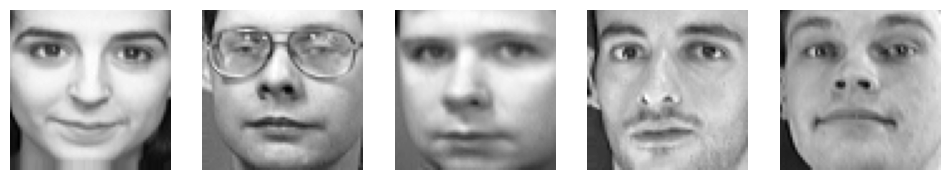

In [62]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
  ax[i].imshow(faces[i].reshape(64, 64), cmap='gray')
  ax[i].axis('off')

In [63]:
mean = np.mean(faces, axis=0)
faces_centered = faces - mean

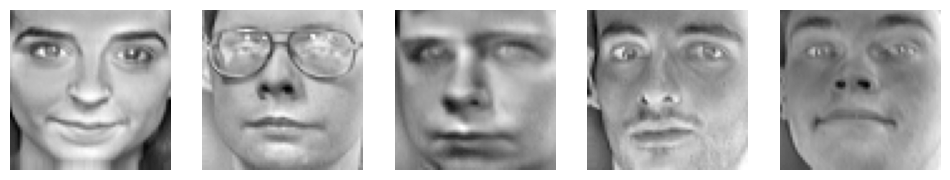

In [64]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(faces_centered[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

<Axes: >

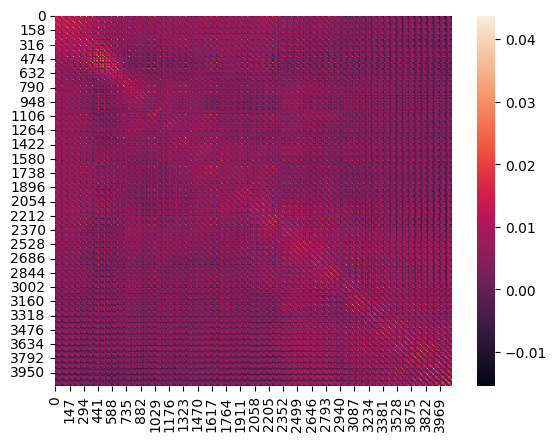

In [65]:
faces_cov = np.cov(faces_centered.T)
sns.heatmap(faces_cov)

In [66]:
l, Q = np.linalg.eigh(faces_cov)
l.shape, Q.shape

((4096,), (4096, 4096))

In [67]:
idx = l.argsort()[::-1]
l = l[idx]
Q = Q[:, idx]

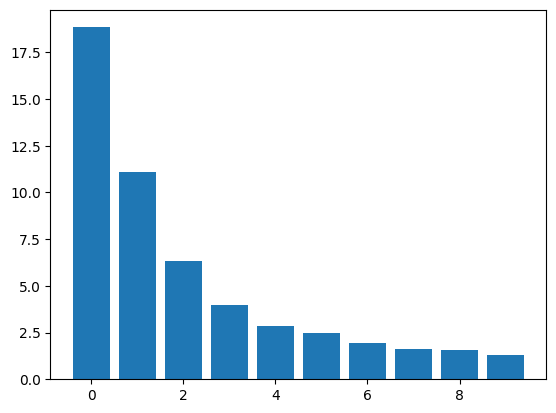

In [68]:
plt.bar(x = range(10), height=l[:10]);

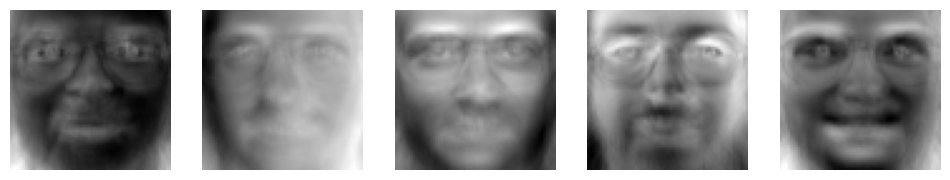

In [69]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(Q[:, i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

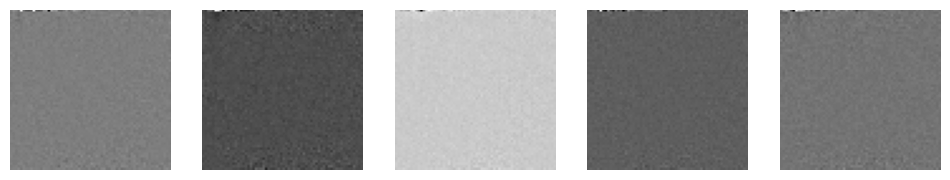

In [70]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(-5, 0):
    ax[i].imshow(Q[:, i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

In [71]:
faces_projected = faces_centered @ Q
faces_projected.shape

(400, 4096)

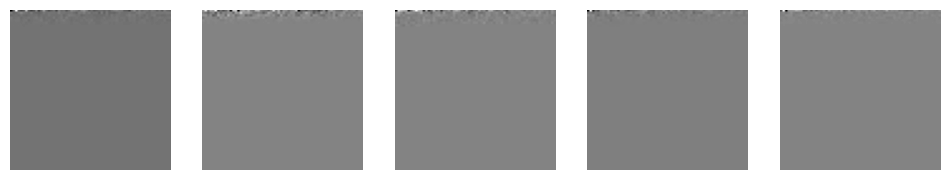

In [72]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(faces_projected[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

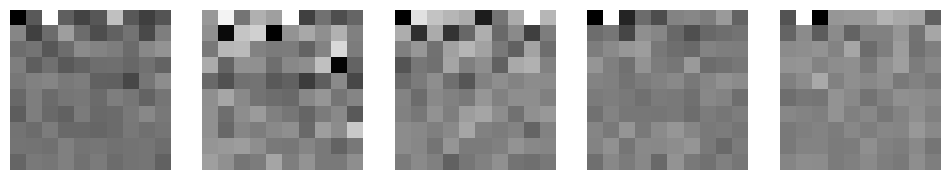

In [73]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(faces_projected[i][:100].reshape(10, 10), cmap='gray')
    ax[i].axis('off')

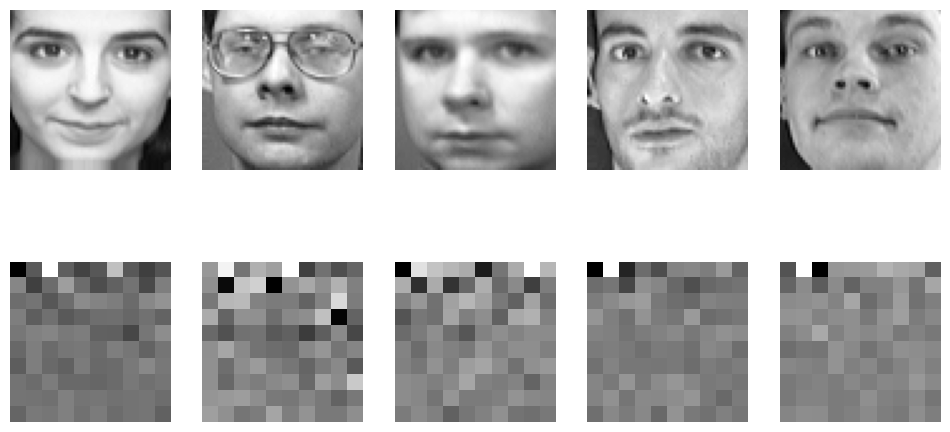

In [74]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    ax[0, i].imshow(faces[i].reshape(64, 64), cmap='gray')
    ax[1, i].imshow(faces_projected[i][:100].reshape(10, 10), cmap='gray')
    ax[0, i].axis('off')
    ax[1, i].axis('off')

In [75]:
Q_inv = np.linalg.inv(Q)

In [76]:
faces_reconstructed = faces_projected @ Q_inv
faces_reconstructed = faces_reconstructed + mean
faces_reconstructed.shape

(400, 4096)

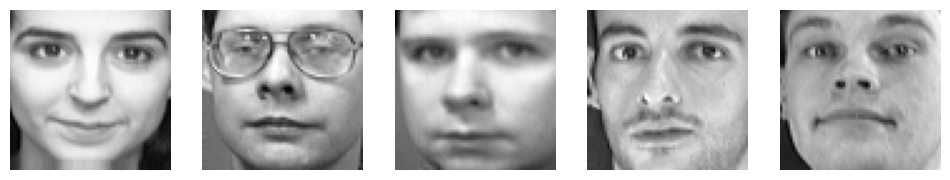

In [77]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(faces_reconstructed[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

# Singular value decomposition

In [86]:
import requests
from PIL import Image
from io import BytesIO

url = 'https://upload.wikimedia.org/wikipedia/commons/7/73/Beach_at_Fort_Lauderdale.jpg'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

if response.status_code == 200 and 'image' in response.headers['Content-Type']:
    img = Image.open(BytesIO(response.content))
    img.save('figs/Beach_at_Fort_Lauderdale.jpg')
    img.show()
else:
    print("Erro ao baixar a imagem ou o conteúdo não é uma imagem válida.")
    print("Status code:", response.status_code)
    print("Content-Type:", response.headers.get('Content-Type'))


©  [Imagem](https://en.wikipedia.org/wiki/File:Beach_at_Fort_Lauderdale.jpg) | Daniel Dudek | [CC-BY-2.0](https://creativecommons.org/licenses/by/2.0/)

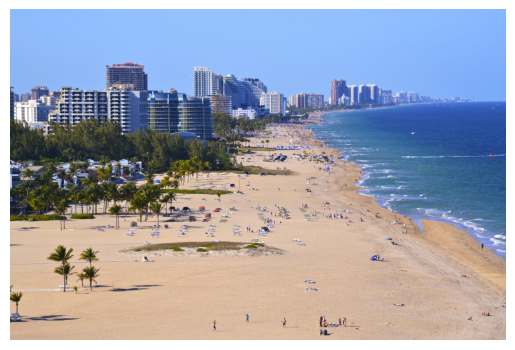

In [87]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('figs/Beach_at_Fort_Lauderdale.jpg')
plt.imshow(img)
plt.axis('off')  # opcional: remove os eixos
plt.show()

1707 2560


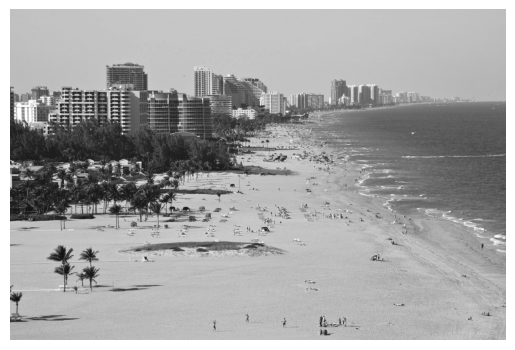

In [91]:
img_array = np.array(img)  # converte PIL.Image para NumPy array
gray_img = img_array.mean(axis=2)  # média dos canais RGB → escala de cinza
w, h = gray_img.shape

print(w, h)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

In [92]:
1707 * 2560

4369920

In [100]:
U, S, Vh = np.linalg.svd(gray_img, full_matrices=False)
U.shape, S.shape, Vh.shape

((1707, 1707), (1707,), (1707, 2560))

In [101]:
S[:10]

array([338382.31772417,  38664.77375322,  25712.47918452,  17472.85014593,
        16535.91281471,  15428.13674181,  12397.22696364,  12045.22988104,
        11730.65949316,  10386.0603223 ])

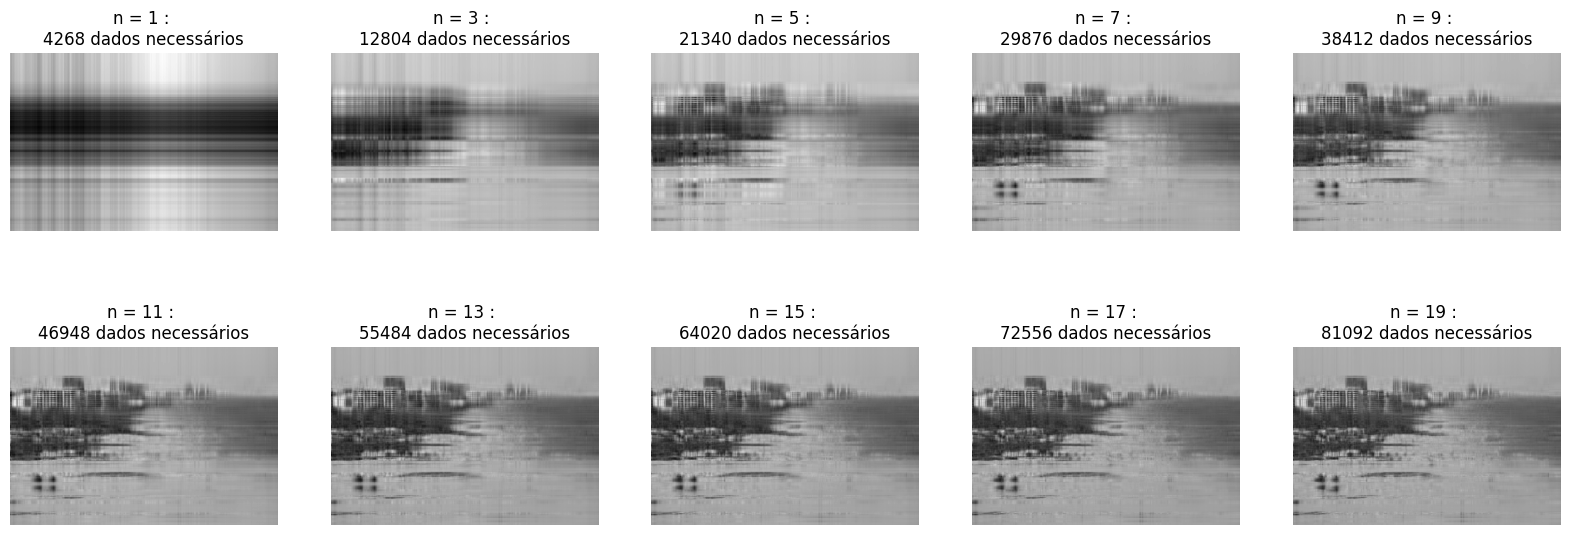

In [103]:
fig, axes = plt.subplots(2, 5, figsize=(20,7))
for i, n in enumerate(range(1, 20, 2)):
  #print(i, n)
  ax = axes.flatten()[i]
  U_n = U[:, :n]
  S_n = np.diag(S[:n])
  Vh_n = Vh[:n, :]
  image_reconstructed = U_n @ S_n @Vh_n
  ax.imshow(image_reconstructed, cmap = 'gray')
  ax.axis('off')
  ax.set_title(f'n = {n} : \n{w * n + n + h * n} dados necessários')

In [104]:
(81092/4369920) * 100

1.855686145284124

# PCA

In [105]:
iris = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)

In [106]:
X, y = iris

In [107]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [108]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
iris_scaled = X_scaled.copy()
iris_scaled['target'] = y
iris_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: Future

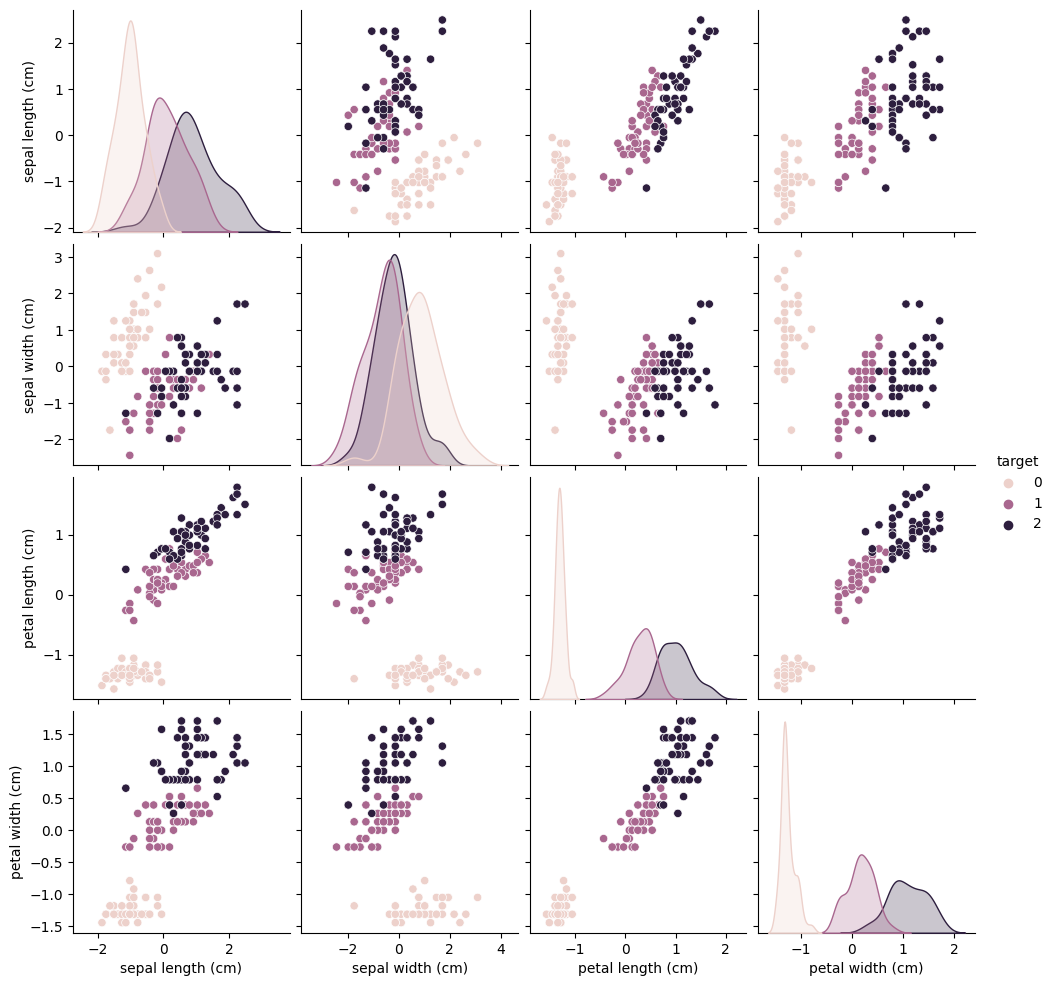

In [110]:
sns.pairplot(iris_scaled, hue = "target")

In [116]:
pca = PCA()
pca.fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)
X_scaled_pca = pd.DataFrame(X_scaled_pca, columns=[f'PC{i}' for i in range(1, 5)])

In [117]:
X_scaled_pca

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,0.127706,-0.024168
1,-2.080961,-0.674134,0.234609,-0.103007
2,-2.364229,-0.341908,-0.044201,-0.028377
3,-2.299384,-0.597395,-0.091290,0.065956
4,-2.389842,0.646835,-0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,-0.256274,-0.389257
146,1.564580,-0.896687,0.026371,-0.220192
147,1.521170,0.269069,-0.180178,-0.119171
148,1.372788,1.011254,-0.933395,-0.026129


c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: Future

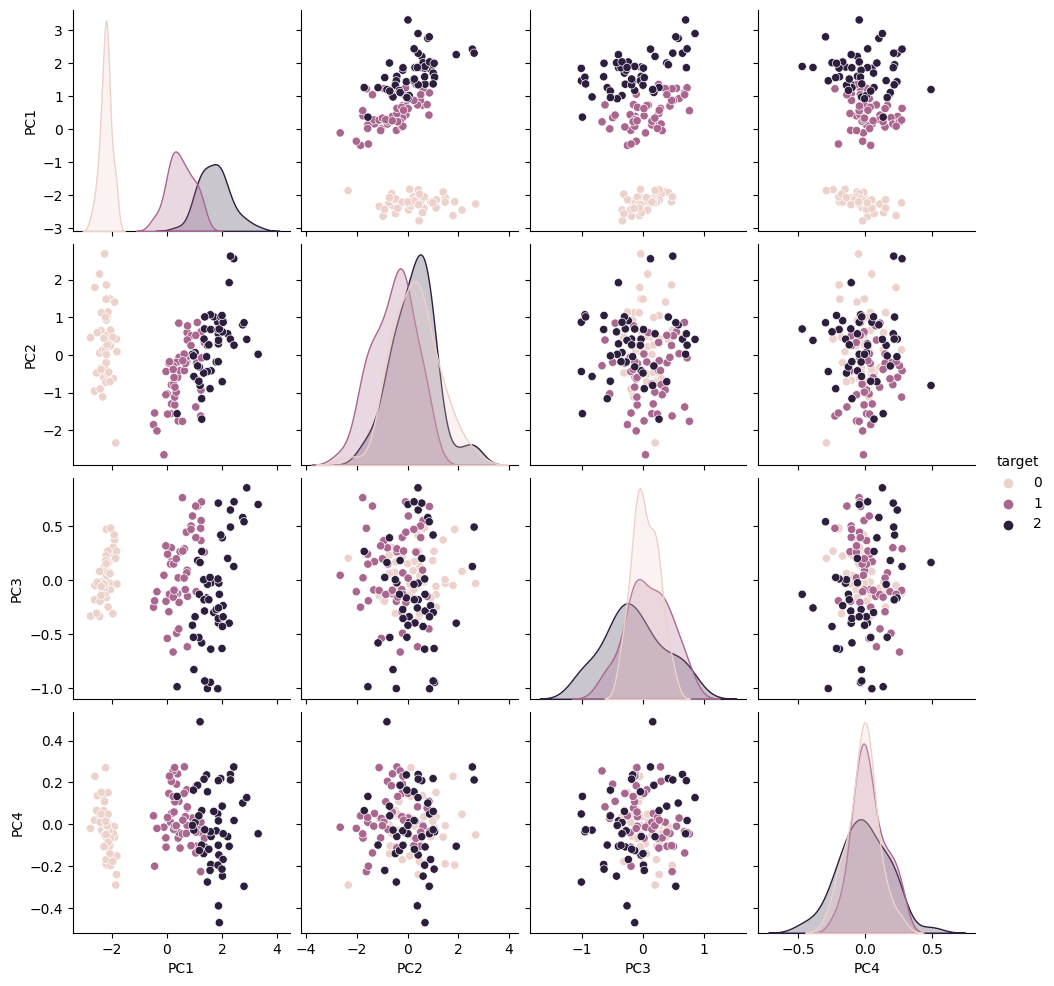

In [118]:
iris_scaled_pca = X_scaled_pca.copy()
iris_scaled_pca['target'] = y
sns.pairplot(iris_scaled_pca, hue='target')

In [119]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [120]:
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Text(0, 0.5, 'PC2')

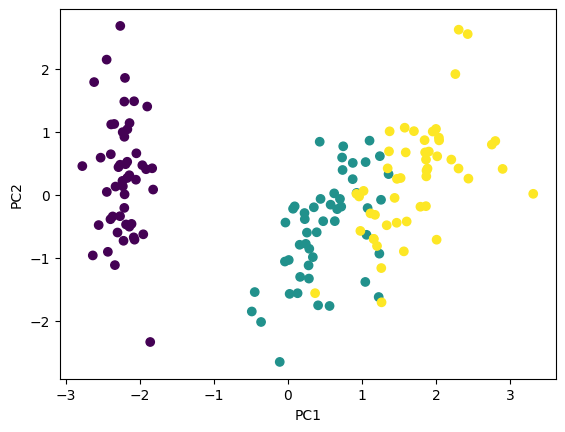

In [121]:
plt.scatter(X_scaled_pca['PC1'], X_scaled_pca['PC2'], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Semelhança entre dados estruturados

In [122]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [123]:
sentences = [
    # sports:
    "The quarterback completed a stunning 75-yard touchdown pass in the final seconds of the game.",
    "The tennis player's serve was clocked at an astonishing 140 miles per hour.",
    "The basketball team clinched their fifth consecutive championship title.",
    "The soccer player scored a hat-trick in his debut match for the national team.",
    "The baseball player hit a home run over the left-field fence.",
    # movies:
    "The highly anticipated sequel to the blockbuster superhero movie is set to hit theaters next summer.",
    "The acclaimed director is working on a new biopic about the life of a famous artist.",
    "The cast of the popular TV series will reunite for a special reunion episode.",
    "The movie's box office performance exceeded all expectations, becoming the highest-grossing film of the year.",
    "The critically acclaimed indie film has been nominated for several Academy Awards.",
    # politics:
    "The newly elected president announced plans to increase government spending on education and healthcare.",
    "The opposition party has called for a vote of no confidence in the prime minister.",
    "The foreign minister met with her counterpart from a neighboring country to discuss regional security issues.",
    "The scandal involving the former minister has led to calls for his resignation.",
    "The government has introduced a new law aimed at reducing corruption and improving transparency."
]

In [124]:
embeddings = model.encode(sentences)
embeddings.shape

(15, 384)

In [125]:
embeddings[14]

array([-6.46197982e-03,  4.64450940e-02,  1.34745808e-02, -5.12355939e-02,
        2.05369834e-02,  2.19520219e-02, -3.83448116e-02, -2.38884725e-02,
       -3.27870473e-02,  4.97304276e-02,  6.83434978e-02,  5.05930483e-02,
        2.11601276e-02, -4.24411632e-02,  6.28485680e-02, -6.40127528e-03,
        6.57657115e-03,  1.18337326e-01, -6.59419820e-02, -3.28107513e-02,
        1.14531167e-01, -2.75693946e-02, -5.72468415e-02,  1.54719632e-02,
       -5.27795032e-02, -2.17711199e-02, -3.61156799e-02, -8.85081217e-02,
        1.16185816e-02, -6.03118688e-02,  1.97104532e-02, -2.20918227e-02,
        7.18415529e-02, -1.09455055e-02,  1.12461601e-03, -5.71597517e-02,
        6.18270189e-02,  1.13122268e-02, -9.16931313e-03,  1.73127428e-02,
        4.14826907e-02, -6.94579855e-02, -3.37140374e-02, -2.06886139e-02,
       -3.19079682e-02,  2.59364098e-02,  5.65555394e-02, -1.07123647e-02,
       -5.34537807e-03, -7.48526603e-02, -7.09873661e-02,  3.10526714e-02,
        1.21308202e-02,  

In [126]:
similarity = cosine_similarity(embeddings)
similarity.shape

(15, 15)

In [127]:
similarity

array([[ 1.00000000e+00,  2.50418544e-01,  1.05557561e-01,
         1.84514463e-01,  2.69196123e-01, -2.19616648e-02,
         3.61076295e-02, -8.37812200e-04,  1.90169483e-01,
        -1.89098287e-02,  5.19516021e-02, -5.42490110e-02,
        -1.69827282e-01,  1.86154246e-02, -2.96191499e-02],
       [ 2.50418544e-01,  1.00000000e+00,  9.61453393e-02,
         1.31507546e-01,  2.54894793e-01,  5.92433265e-04,
         1.58502012e-02, -1.45935751e-02,  1.13862813e-01,
        -3.00337858e-02, -2.27066968e-02, -8.19051266e-02,
         2.67206691e-03, -6.30959645e-02, -1.04149073e-01],
       [ 1.05557561e-01,  9.61453393e-02,  1.00000024e+00,
         9.76127908e-02, -3.74837406e-02,  5.34107685e-02,
         4.73922119e-04,  3.44615132e-02,  7.86087811e-02,
         6.47919700e-02, -4.32810634e-02,  3.84674631e-02,
        -5.71983531e-02, -5.12067005e-02, -3.62232979e-03],
       [ 1.84514463e-01,  1.31507546e-01,  9.76127908e-02,
         1.00000036e+00,  1.80013403e-01, -1.13180384

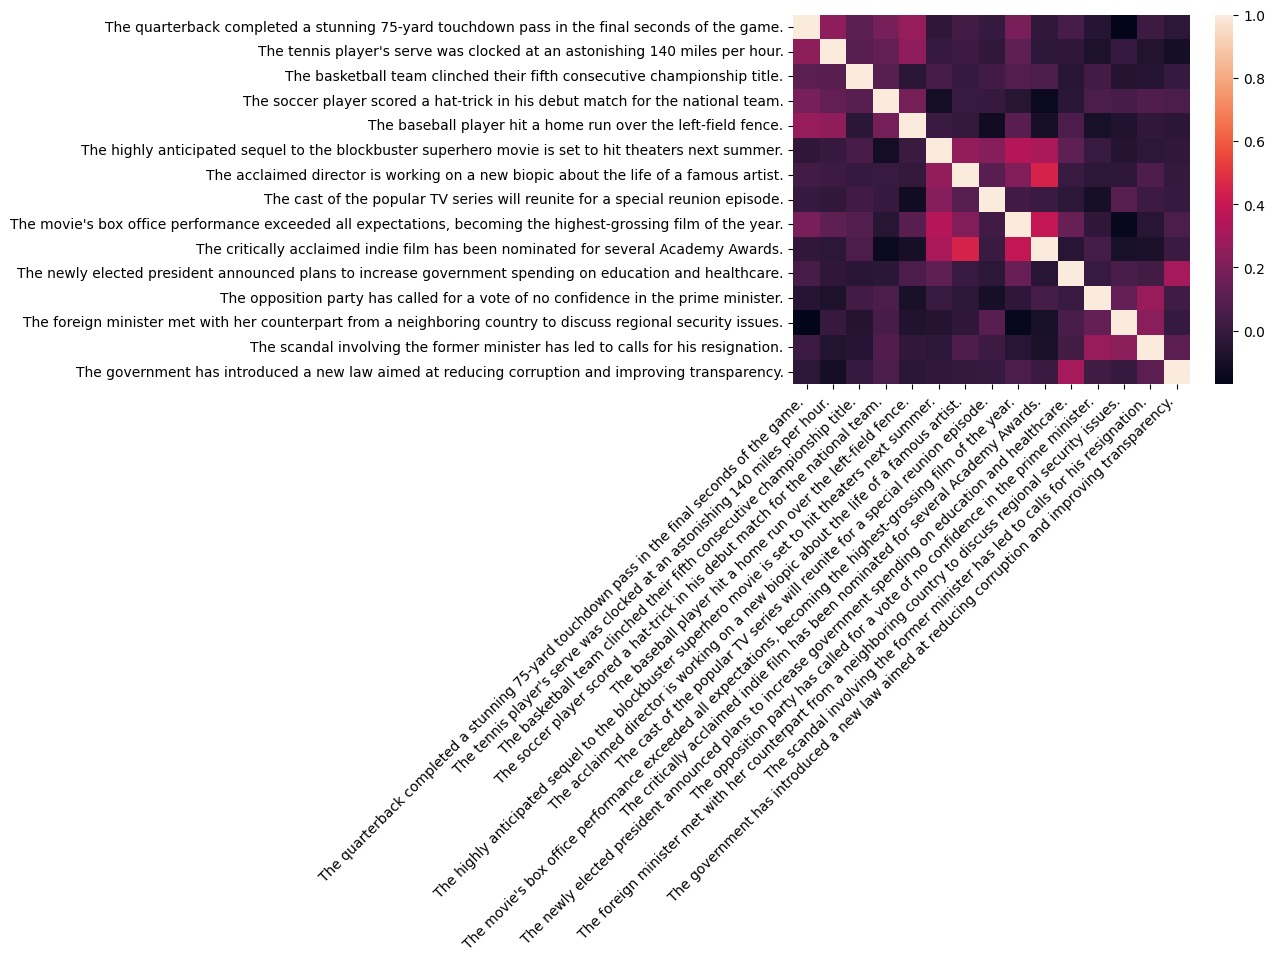

In [128]:
sns.heatmap(similarity, xticklabels=sentences, yticklabels=sentences)
plt.xticks(ha = 'right', rotation = 45);